## Taylor Series in `SymPy`

In [1]:
# prompt:

import sympy as sym
x = sym.Symbol("x")
y = sym.sin(x)
taylor = y.series(x, 0, 5)
print(taylor)


x - x**3/6 + O(x**5)


In [2]:
from sympy import series, symbols
x=symbols('x')
import sympy as sp
expr = sp.sin(x)
series(expr, x, 0, n=10)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

In [3]:
expr2 = series(sp.sin(x), x, 0, n=10)*series(sp.cos(x), x, 0, n=8)
expr2

(1 - x**2/2 + x**4/24 - x**6/720 + O(x**8))*(x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10))

In [4]:
expr2.expand()

x - 2*x**3/3 + 2*x**5/15 - 4*x**7/315 + O(x**9)

In [5]:
from sympy import diff
diff(expr2, x).expand()

1 - 2*x**2 + 2*x**4/3 - 4*x**6/45 + O(x**8)

In [6]:
# como removemos el sumbolo O grande
series(expr, x, 0, n=10).removeO()

x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x

In [7]:
# en todos estos ejemplos se uso x0=0 como referencia
series( expr, x, 1, n=10)

sin(1) + (x - 1)*cos(1) - (x - 1)**2*sin(1)/2 - (x - 1)**3*cos(1)/6 + (x - 1)**4*sin(1)/24 + (x - 1)**5*cos(1)/120 - (x - 1)**6*sin(1)/720 - (x - 1)**7*cos(1)/5040 + (x - 1)**8*sin(1)/40320 + (x - 1)**9*cos(1)/362880 + O((x - 1)**10, (x, 1))

# Calculo Multidimensional
## Vectores
Hacemos comparacion entre `sympy`, `numpy`.

In [8]:
import numpy as np
A = np.array( [ [1], [3], [5]])
B = np.array( [ [0], [2], [4]])
print("A=\n", A)
print("\n")
print("B=\n", B)

A=
 [[1]
 [3]
 [5]]


B=
 [[0]
 [2]
 [4]]


In [9]:
# vectores fila en numpy
A = np.array( [1,3,5])
B = np.array( [0,2,4])
print(A,B)

[1 3 5] [0 2 4]


In [10]:
# ahora en sympy
from sympy import Matrix, symbols
u1, u2, u3, v1, v2, v3 = symbols("u_1, u_2, u_3, v_1, v_2, v_3")

U = Matrix([u1,u2,u3])
V = Matrix([v1,v2,v3])

display(U)
print("\n")
display(V)

Matrix([
[u_1],
[u_2],
[u_3]])

Matrix([
[v_1],
[v_2],
[v_3]])

## Operaciones entre vectores
* suma/resta
* multiplicacion por escalar
* multiplicacion (producto interno o punto)
* producto cruz $\times$.
* multiplicacion Hadamard

In [11]:
display(U+V)
print(A,B)
print(A+B)

Matrix([
[u_1 + v_1],
[u_2 + v_2],
[u_3 + v_3]])

[1 3 5] [0 2 4]
[1 5 9]


In [12]:
# producto punto, la sintaxis es igual en numpy que en sympy
display(U.dot(V)) # sympy
print(A.dot(B))


u_1*v_1 + u_2*v_2 + u_3*v_3

26


In [13]:
# producto cruz
U.cross(V)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

In [14]:
np.cross(A,B)

array([ 2, -4,  2])

In [15]:
U.cross(V).subs( [ (u1, A[0]), (u2, A[1]), (u3, A[2]), (v1, B[0]), (v2, B[1]), (v3,B[2]) ])

Matrix([
[ 2],
[-4],
[ 2]])

In [16]:
## Producto Hadamard, punto-a-punto
U.multiply_elementwise(V)

Matrix([
[u_1*v_1],
[u_2*v_2],
[u_3*v_3]])

In [17]:
# en numpy
print(A,B)
np.multiply(A,B)

[1 3 5] [0 2 4]


array([ 0,  6, 20])

### Norma o longitud de un vector

In [18]:
np.linalg.norm(A) # numpy sqrt(sum x_i^2)

5.916079783099616

In [19]:
U.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

### Actividad 1.
Por que las barras y como removerlas en la ecuacion anterior

## Proyeccion.
Sea $v$ el vector direccion y $u$ el vector a proyectar.


$$P_v u = \frac{u \cdot v}{ \| u \|^2}= \frac{u \cdot v}{v \cdot v}  v.$$

In [20]:
PvU = (U .dot(V))/V.dot(V)*V
PvU

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(v_1**2 + v_2**2 + v_3**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(v_1**2 + v_2**2 + v_3**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(v_1**2 + v_2**2 + v_3**2)]])

### Actividad #2.
Simplifiquen la expresion anterior (sacar factor comun) de forma que se vea como

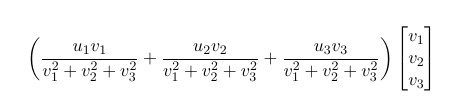

### Actividad #3
Dibujar un vector, una direccion y su proyeccion. Ejemplo.
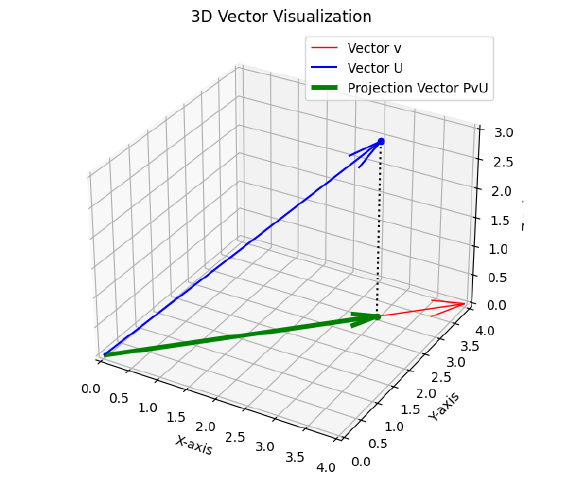


## Lineas en el espacio
Una linea en el espacio (digamos por simplicidad en 3D)
se definie como una funcion parametrica

\begin{eqnarray} L : \mathbb{R} &\to& \mathbb{R}^3 \\
t &\mapsto& (x_1(t), x_2(t), x_3(t))
\end{eqnarray}
donde

* $X = (x_1, x_2, x_3)$ un punto arbitrario en la linea
* $X= X_0 + t U$, donde $X_0$ es un punto por donde pasa la linea $X_0=(x_{01}, x_{02}, x_{03})$. $U$ es la direccion de la linea.

In [21]:
x1, x2, x3 = symbols( 'x_1, x_2, x_3')
u1, u2, u3 = symbols( 'u_1, u_2, u_3')

X0 = Matrix( [x1, x2, x3])
U = Matrix([u1,u2,u3])
t = symbols('t')
Line = X0 + t*U
Line

Matrix([
[t*u_1 + x_1],
[t*u_2 + x_2],
[t*u_3 + x_3]])

Graficamos la recta que pasa por $X0=(1,2,0)$ y tiene la direccion de $U=(1,1,2)$.

In [22]:
import numpy as np
X0 = np.array( [1.0, 2.0, 0.0])
print(X0)
# X0 = np.array( [1,0, 2.0, 0.0])
# print(X0)

[1. 2. 0.]


In [23]:
U = np.array( [1.0, 1.0, 2.0])
LineEval = Line.subs( [ (x1, X0[0]),(x2, X0[1]),(x3, X0[2]), (u1, U[0]), (u2, U[1]), (u3, U[2])])
LineEval

Matrix([
[1.0*t + 1.0],
[1.0*t + 2.0],
[      2.0*t]])

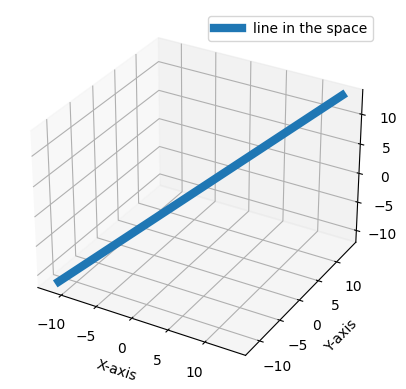

<Axes3D: xlabel='X-axis', ylabel='Y-axis', zlabel='Z-axis'>

In [24]:
# graficamos
import matplotlib.pyplot as plt
import numpy as np
from sympy import lambdify

ax = plt.figure().add_subplot(projection='3d')

# preparemos los puntos a graficar
w = np.linspace(-4*np.pi, 4*np.pi, 100) # dominio
x = lambdify(t, LineEval[0])
y = lambdify(t, LineEval[0])
z = lambdify(t, LineEval[0])

# las etiquetas
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

ax.plot( x(w), y(w), z(w), label='line in the space', linewidth=6)
ax.legend()
plt.show()
ax



### Planos en el espacio.
Recuerden lo que hice a mano alzada

$$n \cdot (x - x_0) = 0 .$$
donde $n$ es un vector direccion, $x_0$ es un punto por el cual pasa el plano y $x$ es un punto arbitrario del plano

In [25]:
from sympy import expand
n1,n2,n3 = symbols('n_1, n_2, n_3')
x,y,z = symbols('x,y,z')
x01, x02, x03 = symbols( 'x01,x02, x03')

N = Matrix( [n1,n2,n3])
X = Matrix ( [x, y, z])
X0 = Matrix ( [x01, x02, x03])

Plane = N.dot(X-X0)
Plane

n_1*(x - x01) + n_2*(-x02 + y) + n_3*(-x03 + z)

Asumimos
$n=(3,-1,2)$ y $x_0=(3,2,0)$

In [26]:
n = Matrix([3,-1,2])
X0 = Matrix([3,2,0])
PlaneSubs = Plane.subs( [ (n1, n[0]),(n2, n[1]), (n3, n[2]), (x01, X0[0]), (x02, X0[1]), (x03, X0[2])])
PlaneSubs

3*x - y + 2*z - 7

In [27]:
# resolvamos por z
from sympy import solve
explicitPlane = solve(PlaneSubs, z)
explicitPlane

[-3*x/2 + y/2 + 7/2]

In [29]:
# lambdify
zPlane = lambdify( [x,y], explicitPlane[0], "sympy")
zPlane(1,2)

3.0

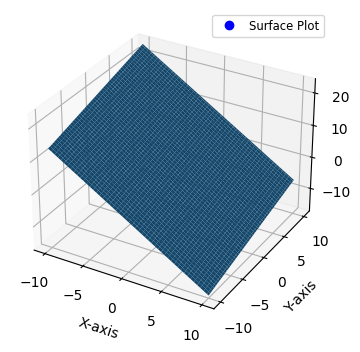

In [31]:
# graficamos el plano

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=[7.00, 3.50]
plt.rcParams["figure.autolayout"]=True


x = np.linspace(-10,10,100) # dominio x
y = np.linspace(-10,10,100) # dominio y

# toca crear una maya
x,y = np.meshgrid(x,y)
z = zPlane(x,y)

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

# etiquetas
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

myPlane = ax.plot_surface(x,y,z, label="Un plano")

# el dumi es para la leyenda
dummy = plt.Line2D( [0], [0], linestyle="none", c='b', marker='o')
ax.legend( [dummy], ['Surface Plot'], loc='upper right', fontsize='small')

plt.show()

### Actividad #4
Dados dos planos generados por los vectores


$$ n = (1,2,1) \quad , \quad x_0=(1,2,3) .$$
y
$$ n = (-1,-1,3) \quad , \quad x_0=(-1,1,0) .$$

Encontrar la interseccion de los dos planos (es una recta) usando `SymPy`.

Dibuje los planos y la recta donde se intersectan. Verifique que la recta pasa por el punto $x_0$ y es perpendicular a ambos planos. Es decir es perpendicular al vector $n_2 \times n_2$.




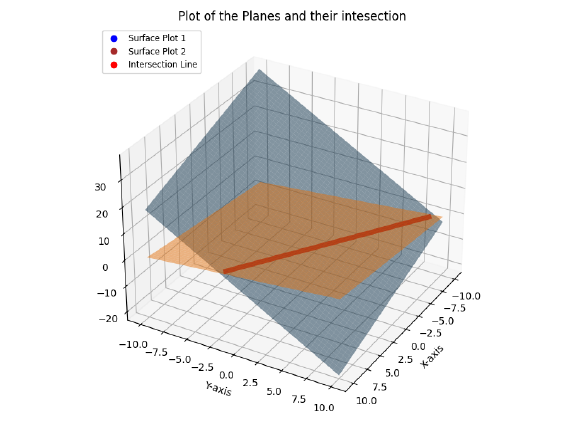